In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import pickle
import time
from PIL import Image
import os, sys
import math
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation,Conv2D, MaxPooling2D, GlobalAveragePooling2D


ModuleNotFoundError: No module named 'tensorflow'

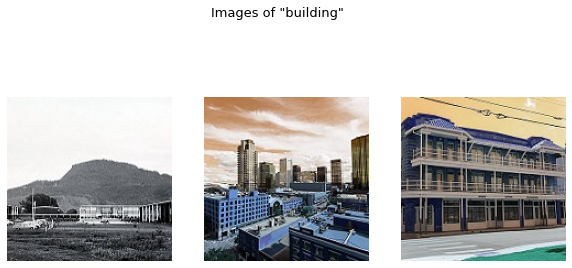

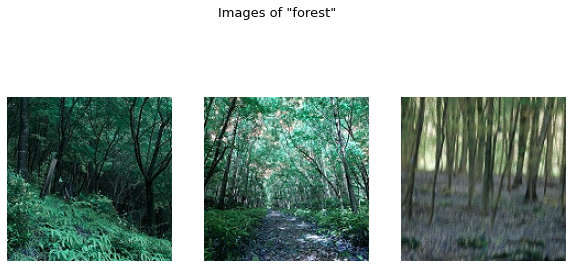

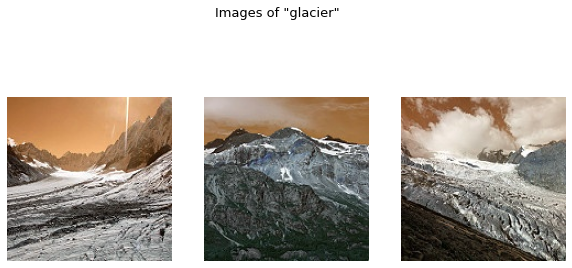

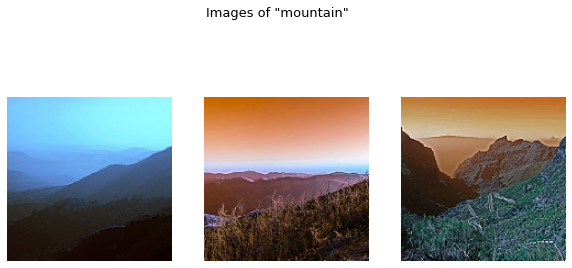

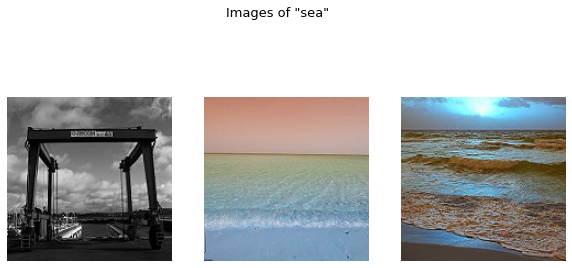

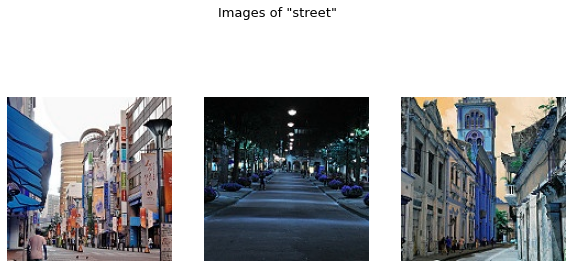

In [60]:
"""
dirs = os.listdir( path )
dirs.sort()
train=np.zeros((2274,150,150,3))

categories = ["buildings","forest","glacier","mountain","sea","street"]

for category in categories:
    win=plt.figure(figsize = (10,5))
    if category=='buildings':
        win.suptitle("Images of \"building\"", fontsize=13)
    if category=='forest':
        win.suptitle("Images of \"forest\"", fontsize=13)
    if category=='glacier':
        win.suptitle("Images of \"glacier\"", fontsize=13)
    if category=='mountain':
        win.suptitle("Images of \"mountain\"", fontsize=13)
    if category=='sea':
        win.suptitle("Images of \"sea\"", fontsize=13)
    if category=='street':
        win.suptitle("Images of \"street\"", fontsize=13)
    index = 1
    for img in os.listdir(os.path.join(r"C:\Users\Gehrm\OneDrive\Desktop\SOFIA\seg_train\seg_train",category)):
        #print(os.path.join(r"C:\Users\Gehrm\OneDrive\Desktop\SOFIA\seg_train\seg_train",category))
        image=cv2.imread(os.path.join(r"C:\Users\Gehrm\OneDrive\Desktop\SOFIA\seg_train\seg_train",category,img))
        try:
            win.add_subplot(1,3,index)
            plt.imshow(image)
            plt.axis('off')
            index=index+1
        except:
            break

    plt.show()
    
    
    
"""

In [4]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file,cv2.IMREAD_GRAYSCALE) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]


Images, Labels = get_images(r'C:\Users\sofianguyen\OneDrive\Desktop\SOFIA\seg_train\seg_train\\') #Extract the training images from the folders.

In [5]:
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)
Images = Images.reshape(len(Images),150,150,1)
Labels = Labels.reshape(len(Labels))
x_train, x_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.2, random_state=42)
print("Shape of Images:",x_train.shape,x_test.shape)
print("Shape of Labels:",y_train.shape,y_test.shape)

Shape of Images: (11227, 150, 150, 1) (2807, 150, 150, 1)
Shape of Labels: (11227,) (2807,)


In [145]:


model = keras.Sequential()

model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(150,150,1)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(8,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(8,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(150,activation='relu'))
model.add(tf.keras.layers.Dense(6,activation='softmax'))

model.compile(Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 128)     1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 8)         4616      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 8)       

In [270]:

history = model.fit(x_train, y_train,
                epochs=13,
                batch_size=32, # trains # samples each epoch
                verbose = 1, #Shows progress while training
                validation_data = (x_test,y_test))

Epoch 1/13
351/351 [==============================] - 339s 966ms/step - loss: 1.9423 - accuracy: 0.2435 - val_loss: 1.6659 - val_accuracy: 0.2811
Epoch 2/13
351/351 [==============================] - 343s 978ms/step - loss: 1.5739 - accuracy: 0.3442 - val_loss: 1.3069 - val_accuracy: 0.4653
Epoch 3/13
351/351 [==============================] - 342s 974ms/step - loss: 1.1778 - accuracy: 0.5241 - val_loss: 1.1044 - val_accuracy: 0.5586
Epoch 4/13
351/351 [==============================] - 370s 1s/step - loss: 1.0589 - accuracy: 0.5788 - val_loss: 1.0221 - val_accuracy: 0.5939
Epoch 5/13
351/351 [==============================] - 361s 1s/step - loss: 0.9808 - accuracy: 0.6097 - val_loss: 0.9777 - val_accuracy: 0.6195
Epoch 6/13
351/351 [==============================] - 357s 1s/step - loss: 0.9196 - accuracy: 0.6409 - val_loss: 0.9557 - val_accuracy: 0.6220
Epoch 7/13
351/351 [==============================] - 396s 1s/step - loss: 0.8766 - accuracy: 0.6581 - val_loss: 0.9030 - val_accurac

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('# of epochs')
plt.legend(['Train set', 'Test set'])
plt.savefig("accuracy_1")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss of model')
plt.ylabel('Loss')
plt.xlabel('# of epochs')
plt.legend(['Train set', 'Test set'])
plt.savefig("loss_1")



NameError: name 'history' is not defined

In [7]:
#model.save('acc_model1.h5')
#model = load_model(r"C:\Users\Gehrm\OneDrive\Desktop\SOFIA\acc_model1.h5")

model.save('acc_model1.h5')
#model = load_model(r"C:\Users\Gehrm\OneDrive\Desktop\SOFIA\64_32_32_35_noDOA.h5")

In [56]:

weights = model.get_weights()
hparameters1 = {
    'stride':1,
    'pad':0
}
hparameters2 = {
    'stride':2,
    'f':2
}


In [57]:
def zero_pad(img, pad):

    img_pad = np.pad(img, ((0,0), (pad, pad), (pad, pad), (0,0)), 'constant', constant_values = 0)
    return img_pad


In [142]:
#Activation functions
def relu(X):
   return np.maximum(0,X)
def softmax(X):
   return np.exp(X)/np.sum(np.exp(X))


In [59]:

def fft_forward(img,w, b,hparameters1):
    (kernel, n_C_prev, n_C) = w.shape[0], w.shape[2], w.shape[3] 
    l = img.shape[1]
    img = img[:,:,:,:]
    m = 1
    if l % 2 == 0: # checks even number 
        l = l-1
        pad = (l - kernel) // 2
        img = img[0,:l,:l,0]
        for mm in range(m):
            final = np.zeros((img.shape))
            new = np.zeros((1,l,l,n_C))
            for i in range(n_C):
                f3 = np.pad(w[:,:,0,i],  (pad, pad)) ## takes care of only 2
                f = np.fft.fft2(img)
                f21 = np.fft.fft2(f3)
                aaa = f * f21
                final = np.fft.ifft2(aaa)  + final
                
                new[:,1:l // 2+1,1:l // 2+1,i] = final.real[l // 2+1:,l // 2+1:]
                new[:,1:l // 2+1,l // 2+1:,i] = final.real[l // 2+1:,1:l // 2+1]
                new[:,l // 2+1:,1:l // 2+1,i] = final.real[1:l // 2+1,l // 2+1:]
                new[:,l // 2+1:,l // 2+1:,i] = final.real[1:l // 2+1,1:l // 2+1]
                new[:,1:l,1:l,i] = new[:,1:l,1:l,i] + b[:,:,:,i] 

    return new,img

def fft_model(img, weights, hparameters1, hparameters2):
    fft = relu(fft_forward(img, weights[0], weights[1].reshape(1,1,1,weights[1].shape[0]), hparameters1)[0])
    pool = pool_forward(fft, hparameters2)[0]
    
    fft1 = relu(fft_forward(pool, weights[2], weights[3].reshape(1,1,1,weights[3].shape[0]), hparameters1)[0])
    pool1 = pool_forward(fft1, hparameters2)[0]
    
    fft2 = relu(fft_forward(pool1, weights[4], weights[5].reshape(1,1,1,weights[5].shape[0]), hparameters1)[0])
    pool2 = pool_forward(fft2, hparameters2)[0]

    flatten = pool2.reshape(1,pool2.shape[1]*pool2.shape[2]*pool2.shape[3])

    neural_net = relu(np.dot(flatten, weights[6]) + weights[7])
    ans = softmax(np.dot(neural_net, weights[8]) + weights[9])

    tup = (ans, fft, pool, fft1, pool1, fft2, pool2)
    return tup



In [143]:
def conv_pixel(imaage_slice_prev, W, b):
    convolted = 0
    convolted = np.multiply(imaage_slice_prev, W)
    convolted = np.sum(convolted) + float (b)
    return convolted

def conv_forward(A_prev, W, b, hparameters):
    

    ( n_W_prev, n_C_prev) = A_prev.shape[2], A_prev.shape[3] 
    
    (kernel, n_C_prev, n_C) = W.shape[0], W.shape[2], W.shape[3] 
    pad = 0
    
    n_W = int(n_W_prev - kernel + 1)
    
    Z = np.zeros((1, n_W, n_W, n_C))
     
    a_prev_pad =  = np.pad(A_prev, ((0,0), (pad, pad), (pad, pad), (0,0)), 'constant', constant_values = 0) 
    """
    
    Padding is for keeping the original size of an 
    image when convolving the image and not loose information 
    of the edges of the image.
    
    """
                                  
    for h in range(n_W):                           
        for w in range(n_W):                       
            for c in range(n_C):                   

                a_slice_prev = a_prev_pad[h:h+kernel,w:w+kernel,:] #We extract the kernel sized pixel set of the image (3x3)
                Z[:,h, w, c] = conv_pixel(a_slice_prev, W[:,:,:,c], b[:,:,:,c]) #convolve the extracted pixel set with the weights and biases of the kernel

    cache = (A_prev, W, b, hparameters)
    return Z, cache

def pool_forward(A_prev, hparameters, mode = "max"):

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         
        for h in range(n_H):                   
            for w in range(n_W): 
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    for c in range (n_C):                 
                        a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]
                        if mode == "max":
                            A[i, h, w, c] = np.max(a_prev_slice)
                        elif mode == "average":
                            A[i, h, w, c] = np.mean(a_prev_slice)

    cache = (A_prev, hparameters)
    
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

def conv_model(img, weights, hparameters1, hparameters2):
    conv = relu(conv_forward(img, weights[0], weights[1].reshape(1,1,1,weights[1].shape[0]), hparameters1)[0])
    pool = pool_forward(conv, hparameters2)[0]
    
    conv1 = relu(conv_forward(pool, weights[2], weights[3].reshape(1,1,1,weights[3].shape[0]), hparameters1)[0])
    pool1 = pool_forward(conv1, hparameters2)[0]
    
    conv2 = relu(conv_forward(pool1, weights[4], weights[5].reshape(1,1,1,weights[5].shape[0]), hparameters1)[0])
    pool2 = pool_forward(conv2, hparameters2)[0]

    flatten = pool2.reshape(1,pool2.shape[1]*pool2.shape[2]*pool2.shape[3])
    neural_net = relu(np.dot(flatten, weights[6]) + weights[7])
    ans = softmax(np.dot(neural_net, weights[8]) + weights[9])
    
    tup = (ans, conv, pool, conv1, pool1, conv2, pool2)
    return tup


In [52]:

start = time.time()
for i in range(1):
  img = (x_test[i]).reshape(1,150,150,1)
  output = conv_model(img, weights, hparameters1, hparameters2)
end = time.time()
  
print('Time for CNN to predict 10 test images: ', end - start)



Time for CNN to predict 10 test images:  39.65685439109802


In [51]:
start = time.time()

for i in range(1):
  img = cv2.resize(x_test[i],(150,150)).reshape(1,150,150,1)
  output1 = fft_model(img, weights,hparameters1,hparameters2)

end = time.time()
print('Time for FFT to predict 10 test images:', end - start) 

ValueError: shapes (1,512) and (392,150) not aligned: 512 (dim 1) != 392 (dim 0)

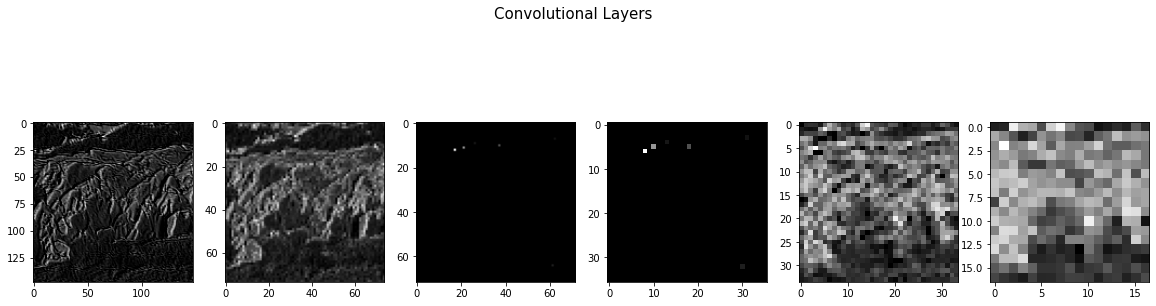

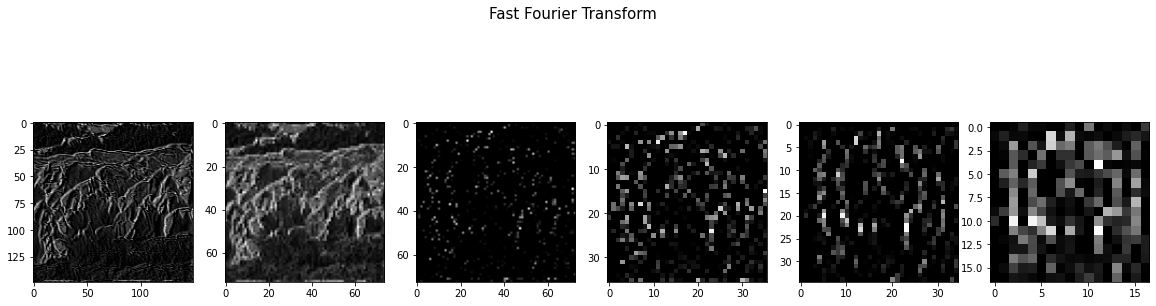

In [148]:
import random
random = random.randint(0,len(x_test))
img = cv2.resize(x_test[random],(150,150)).reshape(1,150,150,1)  
output = conv_model(img, weights,hparameters1 ,hparameters2)
output1 = fft_model(img, weights,hparameters1, hparameters2)


win=plt.figure(figsize=(20,10))
win.suptitle("Convolutional Layers", fontsize=15)
index=1
for i in range(1, len(output)):
    win.add_subplot(2,6,index)
    plt.imshow(output[i][0,:,:,0], cmap='gray') 
    index=index+1
plt.savefig("conv_medium_1")  
plt.show()

win=plt.figure(figsize=(20,10))
win.suptitle("Fast Fourier Transform", fontsize=15)
index=1
for i in range(1, len(output)):
    win.add_subplot(2,6,index)
    plt.imshow(output1[i][0,:,:,0], cmap='gray')
    index=index+1
plt.savefig("fft_medium_1")

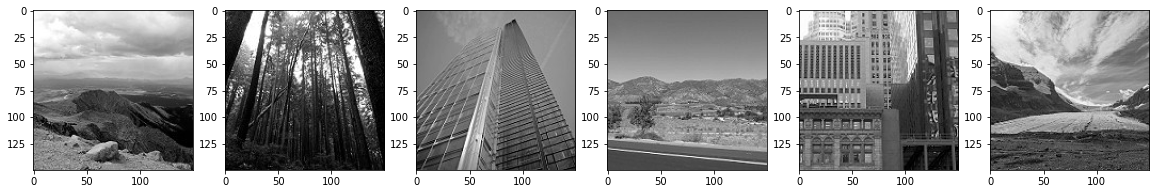

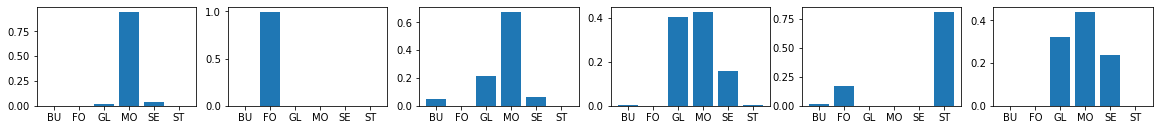

In [327]:
import random

label=["BU","FO","GL","MO","SE","ST"]
Predict, Facit = get_images_pred(r'C:\Users\Gehrm\OneDrive\Desktop\SOFIA\seg_pred\\') #Extract the training images from the folders
Predict= np.array(Predict)
win=plt.figure(figsize=(20,10))
randoms = []
for number in range(6):
    randoms.append(random.randint(0,7000))
plott =1
for randomm in range(6):
    win.add_subplot(2,6,plott)
    plt.imshow((Predict[randoms[randomm]]), cmap='gray')
    plott = plott + 1
plt.savefig("to_predict") 
plt.show()

win=plt.figure(figsize=(20,4))
plott =1
for randomm in range(6):
    predicted_class = []
    nr_classes = []
    image = np.array([Predict[randoms[randomm]]])
    for prediction in range(6):
        predicted_class.append(model.predict(image)[0][prediction])
        nr_classes.append(prediction)
    win.add_subplot(2,6,plott)
    plt.bar(nr_classes,predicted_class)
    plt.xticks(nr_classes,label)
    
    plott = plott+1
plt.savefig("bar") 

plt.show()